## A basic Machine Learning Task on the Coronavirus/Covid-19 Data (infected and death cases in the World and Iran).
## By using [Daily Reports](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports) from January 22 up to March 28. 
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments)

In [1]:
import sys
assert sys.version_info >= (3, 5)
!python --version

Python 3.8.1


In [2]:
import sklearn
import numpy as np
import pandas as pd
assert sklearn.__version__ >= "0.2"
print(sklearn.__version__)

0.22.1


In [3]:
import os
path1=os.path.join("newdata","covid19","")
print(path1)

newdata\covid19\


In [4]:
date=pd.date_range(start='01-22-2020', end='03-28-2020', freq='D') 
date_number=pd.Series(date)

In [5]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
os.makedirs(path1, exist_ok=True)
for i in date[0:]:
    str1=str(i)[0:10]
    filename=str1[5:7]+"-"+str1[-2:]+"-"+str1[:4]+".csv"
    print("Downloading", filename)
    url = DOWNLOAD_ROOT +filename
    urllib.request.urlretrieve(url,path1+filename)
#url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-15-2020.csv"
#os.makedirs(path1, exist_ok=True)
#urllib.request.urlretrieve(url,path1+"03-15-2020.csv")

In [6]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=9)
mpl.rc('ytick', labelsize=9)

In [7]:
%cd \Users\Zahra\newdata\covid19\

C:\Users\Zahra\newdata\covid19


In [8]:
path1

'newdata\\covid19\\'

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn.linear_model

In [10]:
def prepare_covid_19_daily_stats(L):
    a=0
    def_w=0
    def_i=0
    S_w=[]
    S_i=[]
    for i in L:
        A1=pd.DataFrame([[0,''],[0,'']],index=['World','Iran'],columns=["Confirmed","Last Update"])
        if ('Country_Region' in i[0].columns):
            i[0]=i[0].rename(columns={'Country_Region': 'Country/Region'})
        if ('Last_Update' in i[0].columns):
            i[0]=i[0].rename(columns={'Last_Update': 'Last Update'})
        i[0]=i[0].groupby("Country/Region").sum()
        if ('Iran (Islamic Republic of)' in i[0].index):
            i[0]=i[0].rename(index={'Iran (Islamic Republic of)': 'Iran'})
        if ('Iran' in i[0].index):
            conf=[abs(i[0]['Confirmed'].sum()-def_w),abs(i[0]['Confirmed']['Iran']-def_i)]
            def_w=i[0]['Confirmed'].sum()
            def_i=i[0]['Confirmed']['Iran']
        else:
            conf=[abs(i[0]['Confirmed'].sum()-def_w),abs(0-def_i)]
            def_w=i[0]['Confirmed'].sum()
            def_i=0
        A1["Confirmed"]=conf
        A1["Last Update"]=[i[1],i[1]]
        S_w=S_w+[conf[0]]
        S_i=S_i+[conf[1]]
        if a>0:
            dataf=pd.concat([dataf,A1])
        else:
            dataf=A1.copy()
        a+=1
        
    ts_w=pd.Series(S_w,index=pd.date_range(start='01-22-2020', end='03-28-2020', freq='D'))
    ts_i=pd.Series(S_i,index=pd.date_range(start='01-22-2020', end='03-28-2020', freq='D'))
    stat=pd.concat([ts_w,ts_i],axis=1)
    stat.columns=['Confirmed_World','Confirmed_Iran']
    
    return [dataf,ts_w,ts_i,stat]

In [11]:
def prepare_covid_19_daily_stats_death(L):
    a=0
    def_w=0
    def_i=0
    S_w=[]
    S_i=[]
    for i in L:
        A1=pd.DataFrame([[0,''],[0,'']],index=['World','Iran'],columns=["Deaths","Last Update"])
        if ('Country_Region' in i[0].columns):
            i[0]=i[0].rename(columns={'Country_Region': 'Country/Region'})
        if ('Last_Update' in i[0].columns):
            i[0]=i[0].rename(columns={'Last_Update': 'Last Update'})
        i[0]=i[0].groupby("Country/Region").sum()
        if ('Iran (Islamic Republic of)' in i[0].index):
            i[0]=i[0].rename(index={'Iran (Islamic Republic of)': 'Iran'})
        if ('Iran' in i[0].index):
            conf=[abs(i[0]['Deaths'].sum()-def_w),abs(i[0]['Deaths']['Iran']-def_i)]
            def_w=i[0]['Deaths'].sum()
            def_i=i[0]['Deaths']['Iran']
        else:
            conf=[abs(i[0]['Deaths'].sum()-def_w),abs(0-def_i)]
            def_w=i[0]['Deaths'].sum()
            def_i=0
        A1["Deaths"]=conf
        A1["Last Update"]=[i[1],i[1]]
        S_w=S_w+[conf[0]]
        S_i=S_i+[conf[1]]
        if a>0:
            dataf=pd.concat([dataf,A1])
        else:
            dataf=A1.copy()
        a+=1
        
    ts_w=pd.Series(S_w,index=pd.date_range(start='01-22-2020', end='03-28-2020', freq='D'))
    ts_i=pd.Series(S_i,index=pd.date_range(start='01-22-2020', end='03-28-2020', freq='D'))
    stat=pd.concat([ts_w,ts_i],axis=1)
    stat.columns=['Deaths_World','Deaths_Iran']
    
    return [dataf,ts_w,ts_i,stat]

In [12]:
# Load the data
#from datetime import datetime
L=[]
for i in date[0:]:
    str1=str(i)[0:10]
    filename1=str1[5:7]+"-"+str1[-2:]+"-"+str1[:4]
    filename=filename1+".csv"
    L=L+ [[pd.read_csv(filename),filename1]]

# Prepare data
covid_19_daily_stats=prepare_covid_19_daily_stats(L)
covid_19_daily_stats_death=prepare_covid_19_daily_stats_death(L)

## Covid 19 Confirmed Cases in the world and Iran

In [13]:
#Dataframe containing daily confirmed cases in Iran and the World
covid_19_daily_stats[0]

,Confirmed,Last Update
World,555.0,01-22-2020
Iran,0.0,01-22-2020
World,98.0,01-23-2020
Iran,0.0,01-23-2020
World,288.0,01-24-2020
...,...,...
Iran,2389.0,03-26-2020
World,63700.0,03-27-2020
Iran,2926.0,03-27-2020
World,67415.0,03-28-2020


In [14]:
#Time Series containing daily confirmed cases in the World
covid_19_daily_stats[1]

2020-01-22      555.0
2020-01-23       98.0
2020-01-24      288.0
2020-01-25      497.0
2020-01-26      680.0
               ...   
2020-03-24    39679.0
2020-03-25    49628.0
2020-03-26    61997.0
2020-03-27    63700.0
2020-03-28    67415.0
Freq: D, Length: 67, dtype: float64

In [15]:
#Time Series containing daily confirmed cases in Iran
covid_19_daily_stats[2]

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-03-24    1762
2020-03-25    2206
2020-03-26    2389
2020-03-27    2926
2020-03-28    3076
Freq: D, Length: 67, dtype: int64

In [16]:
covid_19_daily_stats[3]

,Confirmed_World,Confirmed_Iran
2020-01-22,555.0,0
2020-01-23,98.0,0
2020-01-24,288.0,0
2020-01-25,497.0,0
2020-01-26,680.0,0
...,...,...
2020-03-24,39679.0,1762
2020-03-25,49628.0,2206
2020-03-26,61997.0,2389
2020-03-27,63700.0,2926


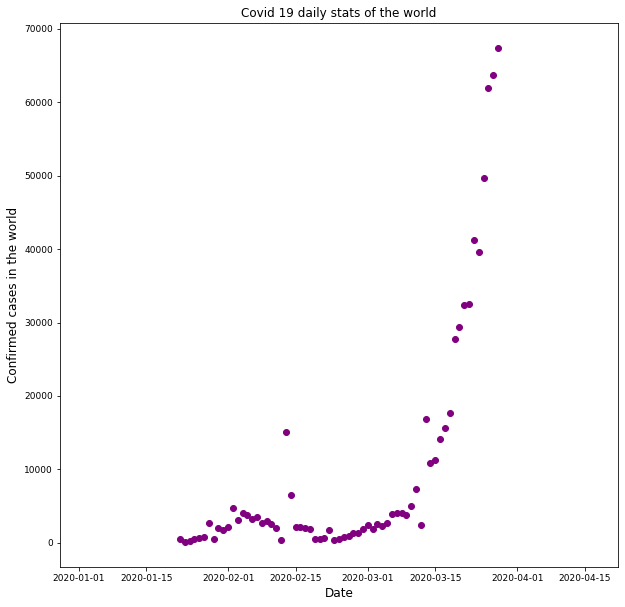

[[6.5675882e-12]]
[[-10383362.79782904]]


In [17]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Confirmed cases in the world",title="Covid 19 daily stats of the world")
plt.show()

x1=np.c_[covid_19_daily_stats[3].index.values]
y1=np.c_[covid_19_daily_stats[3]['Confirmed_World']]
# Select a linear model
model=sklearn.linear_model.LinearRegression()
# Train the model
model.fit(x1,y1)
print(model.coef_)

x1_b = [[100]]
print(model.predict(x1_b)) 

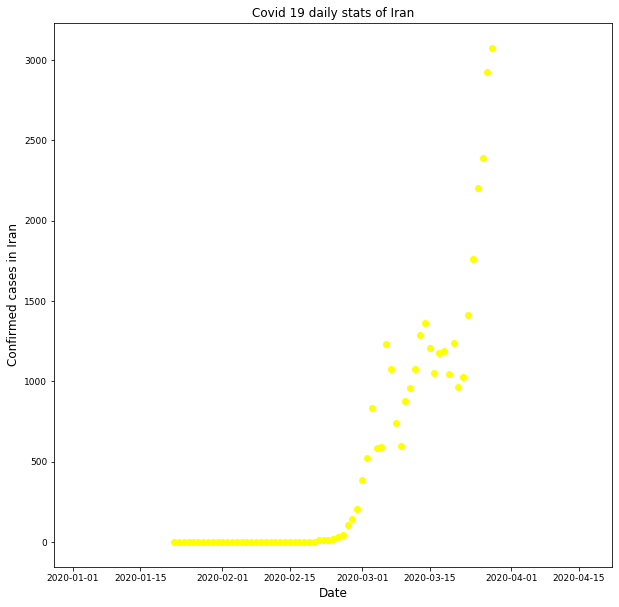

[[3.69844276e-13]]
[[-584750.97693351]]


In [18]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_Iran'],color='yellow')
ax.set(xlabel="Date",ylabel="Confirmed cases in Iran",title="Covid 19 daily stats of Iran")
plt.show()

x=np.c_[covid_19_daily_stats[3].index.values]
y=np.c_[covid_19_daily_stats[3]['Confirmed_Iran']]
# Select a linear model
model=sklearn.linear_model.LinearRegression()
# Train the model
model.fit(x,y)
print(model.coef_)

x_b = [[100]]
print(model.predict(x_b)) 

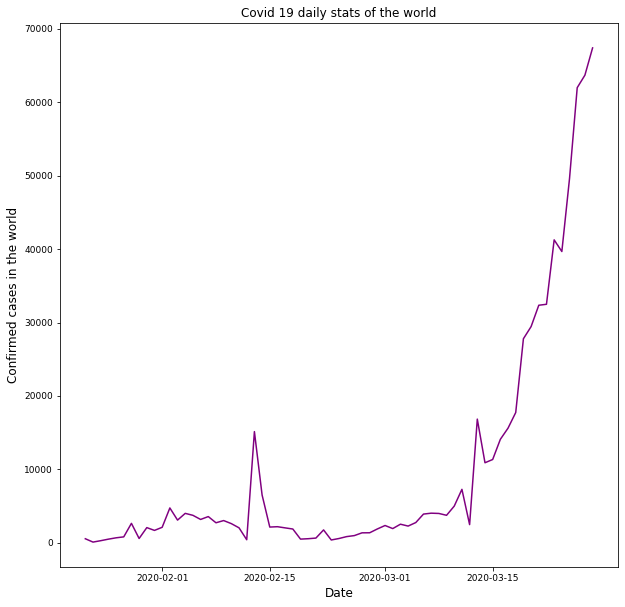

In [19]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Confirmed cases in the world",title="Covid 19 daily stats of the world")
plt.show()

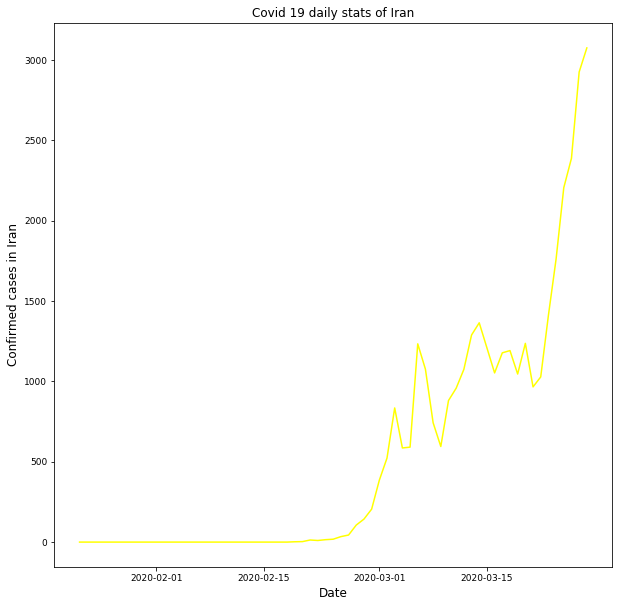

In [20]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_Iran'],color='yellow')
ax.set(xlabel="Date",ylabel="Confirmed cases in Iran",title="Covid 19 daily stats of Iran")
plt.show()

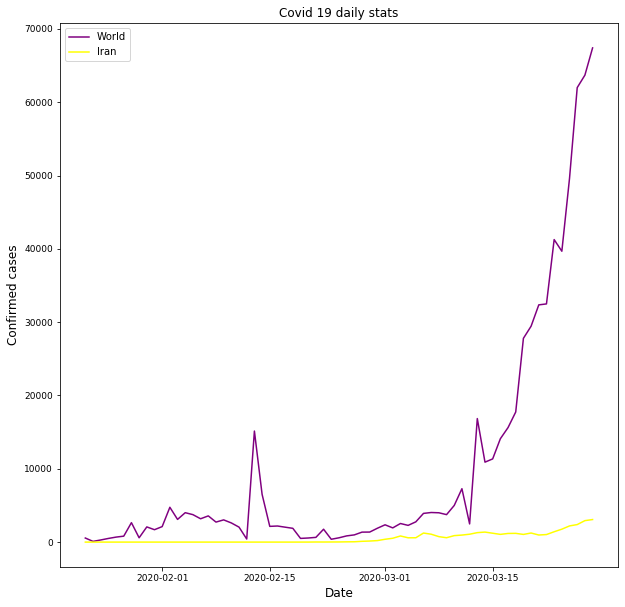

In [21]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Confirmed cases",title="Covid 19 daily stats")
ax.plot(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_Iran'],color='yellow')
ax.set(xlabel="Date",ylabel="Confirmed cases",title="Covid 19 daily stats")
ax.legend(["World", "Iran"], loc=2)
plt.show()

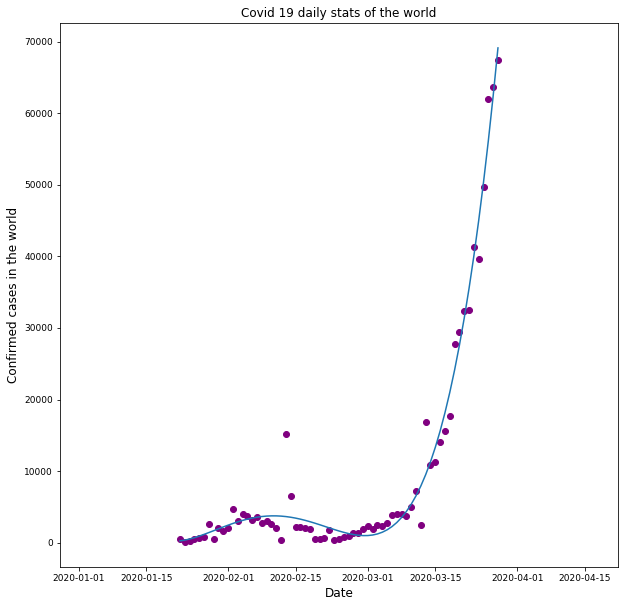

In [22]:
#Model world 's data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Confirmed cases in the world",title="Covid 19 daily stats of the world")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=4, include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(x1, y1)
curve = pipeline_reg.predict(x1)
plt.plot(x1, curve)
plt.show()

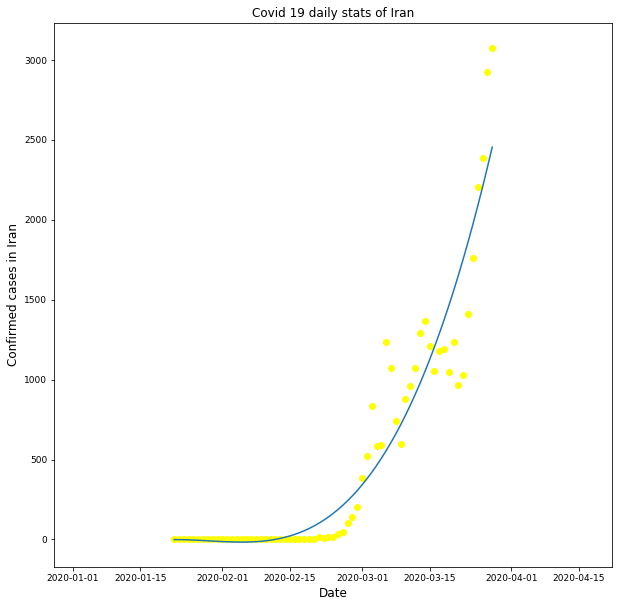

In [23]:
#Model Iran 's data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_Iran'],color='yellow')
ax.set(xlabel="Date",ylabel="Confirmed cases in Iran",title="Covid 19 daily stats of Iran")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=3, include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(x, y)
curve = pipeline_reg.predict(x)
plt.plot(x, curve)
plt.show()

In [24]:
remove_indices=[10,21,38,45,50]
keep_indices=list(set(range(len(covid_19_daily_stats[3].index)))-set(remove_indices))

sample_data=covid_19_daily_stats[3][['Confirmed_World', 'Confirmed_Iran']].iloc[keep_indices]
missing_data=covid_19_daily_stats[3][['Confirmed_World', 'Confirmed_Iran']].iloc[remove_indices]
missing_data

,Confirmed_World,Confirmed_Iran
2020-02-01,2113.0,0
2020-02-12,419.0,0
2020-02-29,1889.0,205
2020-03-07,4036.0,1076
2020-03-12,2478.0,1075


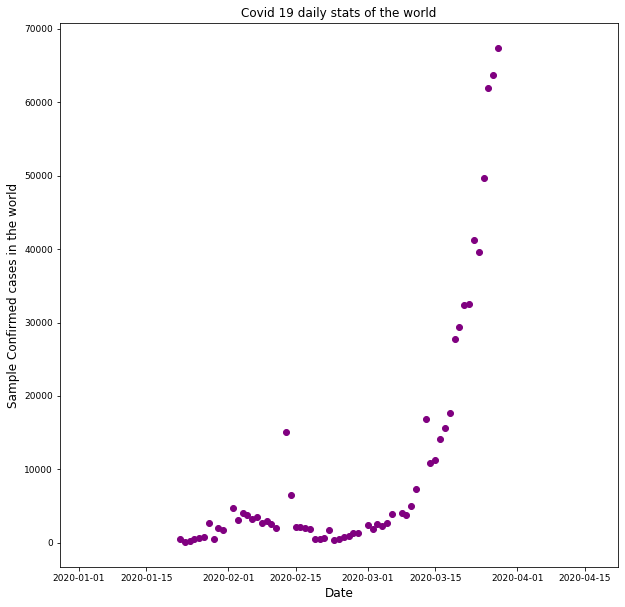

In [25]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(sample_data.index.values,sample_data['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Sample Confirmed cases in the world",title="Covid 19 daily stats of the world")

#plt.axis([0, 60000, 0, 10])
X=date
a=4.5/100000
b=4.5
#plt.plot(X, (a*X)+b, "r")
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   66
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -634.657
Method:                       css-mle   S.D. of innovations           3611.177
Date:                Sun, 29 Mar 2020   AIC                           1283.314
Time:                        18:20:05   BIC                           1298.642
Sample:                    01-23-2020   HQIC                          1289.371
                         - 03-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1332.8410    970.910      1.373      0.170    -570.108    3235.790
ar.L1.D.y     -0.2562      0.122     -2.103      0.035      -0.495      -0.017
ar.L2.D.y      0.1042      0.120      0.871      0.3

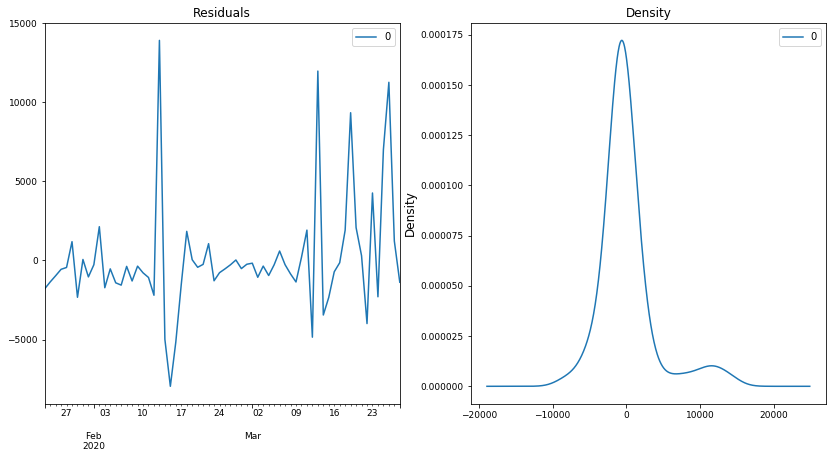

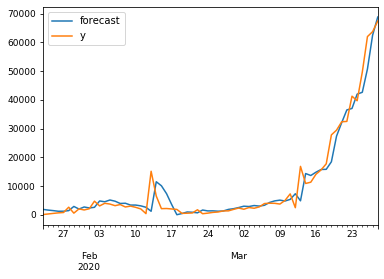

In [26]:
#Model
covid_19_daily_stats[1].to_csv('covid_w.csv')
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
#def parser(x):
    #   return datetime.strptime('%Y-%m')

series=pd.read_csv('covid_w.csv',header=0)
model=ARIMA(covid_19_daily_stats[1],order=(5,1,0))
model_fit=model.fit(desp=0)
print(model_fit.summary())
fig, ax = plt.subplots(1,2,figsize=(14,7))
residuals=DataFrame(model_fit.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
model_fit.plot_predict(dynamic=False)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   66
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -427.257
Method:                       css-mle   S.D. of innovations            156.423
Date:                Sun, 29 Mar 2020   AIC                            868.513
Time:                        18:20:06   BIC                            883.841
Sample:                    01-23-2020   HQIC                           874.570
                         - 03-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.8219     33.000      1.540      0.124     -13.856     115.500
ar.L1.D.y      0.2210      0.123      1.794      0.073      -0.020       0.462
ar.L2.D.y     -0.1148      0.134     -0.860      0.3

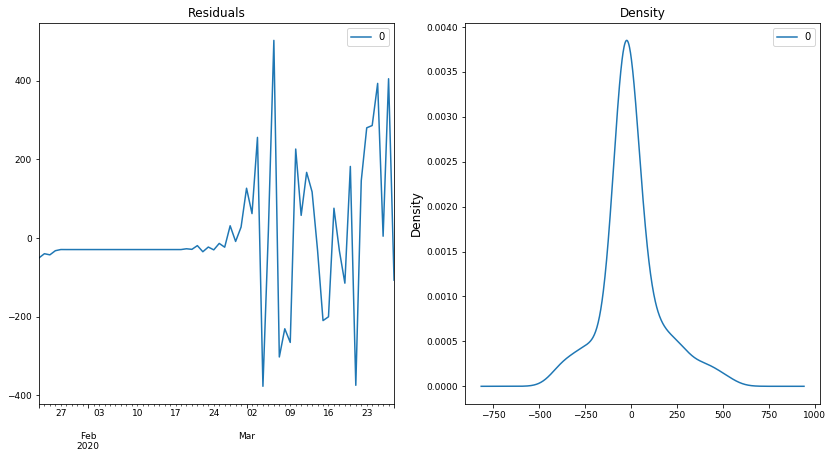

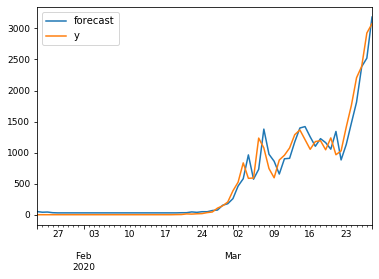

In [27]:
#Model
covid_19_daily_stats[2].to_csv('covid_i.csv')
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
#def parser(x):
    #   return datetime.strptime('%Y-%m')

series=pd.read_csv('covid_i.csv',header=0)
model=ARIMA(covid_19_daily_stats[2],order=(5,1,0))
model_fit=model.fit(desp=0)
print(model_fit.summary())
fig, ax = plt.subplots(1,2,figsize=(14,7))
residuals=DataFrame(model_fit.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
model_fit.plot_predict(dynamic=False)
plt.show()

## Covid 19 Deaths Cases in the world and Iran

In [28]:
#Dataframe containing daily Deaths cases in Iran and the World
covid_19_daily_stats_death[0]

,Deaths,Last Update
World,17.0,01-22-2020
Iran,0.0,01-22-2020
World,1.0,01-23-2020
Iran,0.0,01-23-2020
World,8.0,01-24-2020
...,...,...
Iran,157.0,03-26-2020
World,3228.0,03-27-2020
Iran,144.0,03-27-2020
World,3454.0,03-28-2020


In [29]:
#Time Series containing daily Deaths cases in the World
covid_19_daily_stats_death[1]

2020-01-22      17.0
2020-01-23       1.0
2020-01-24       8.0
2020-01-25      16.0
2020-01-26      14.0
               ...  
2020-03-24    2118.0
2020-03-25    2566.0
2020-03-26    2789.0
2020-03-27    3228.0
2020-03-28    3454.0
Freq: D, Length: 67, dtype: float64

In [30]:
#Time Series containing daily Deaths cases in Iran
covid_19_daily_stats_death[2]

2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
             ... 
2020-03-24    122
2020-03-25    143
2020-03-26    157
2020-03-27    144
2020-03-28    139
Freq: D, Length: 67, dtype: int64

In [31]:
covid_19_daily_stats_death[3]

,Deaths_World,Deaths_Iran
2020-01-22,17.0,0
2020-01-23,1.0,0
2020-01-24,8.0,0
2020-01-25,16.0,0
2020-01-26,14.0,0
...,...,...
2020-03-24,2118.0,122
2020-03-25,2566.0,143
2020-03-26,2789.0,157
2020-03-27,3228.0,144


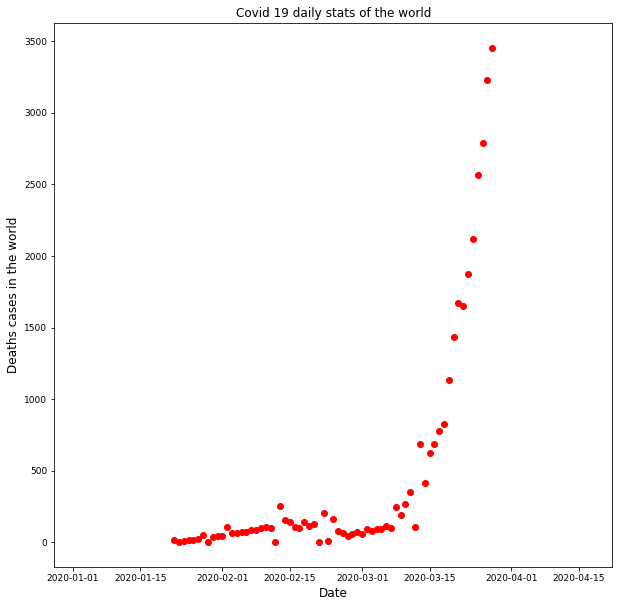

[[3.33403356e-13]]
[[-527154.11860484]]


In [32]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_World'],color='red')
ax.set(xlabel="Date",ylabel="Deaths cases in the world",title="Covid 19 daily stats of the world")
plt.show()

x2=np.c_[covid_19_daily_stats_death[3].index.values]
y2=np.c_[covid_19_daily_stats_death[3]['Deaths_World']]
# Select a linear model
model=sklearn.linear_model.LinearRegression()
# Train the model
model.fit(x2,y2)
print(model.coef_)

x2_b = [[100]]
print(model.predict(x2_b)) 

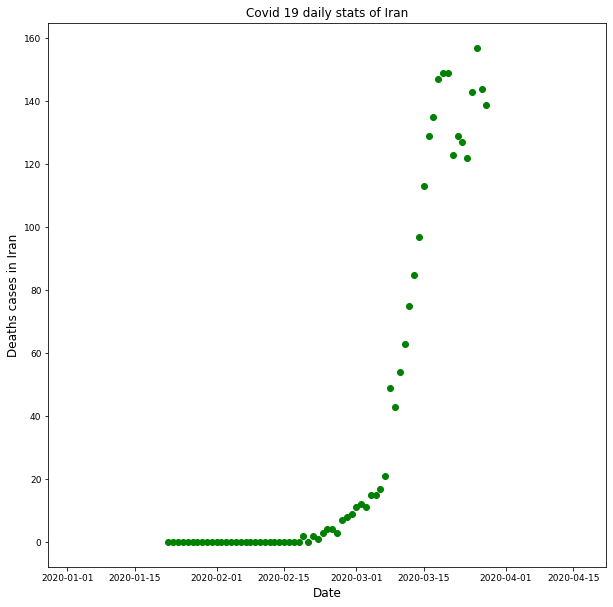

[[2.74834606e-14]]
[[-43455.07518557]]


In [33]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_Iran'],color='green')
ax.set(xlabel="Date",ylabel="Deaths cases in Iran",title="Covid 19 daily stats of Iran")
plt.show()

xx=np.c_[covid_19_daily_stats_death[3].index.values]
yy=np.c_[covid_19_daily_stats_death[3]['Deaths_Iran']]
# Select a linear model
model=sklearn.linear_model.LinearRegression()
# Train the model
model.fit(xx,yy)
print(model.coef_)

xx_b = [[100]]
print(model.predict(xx_b)) 

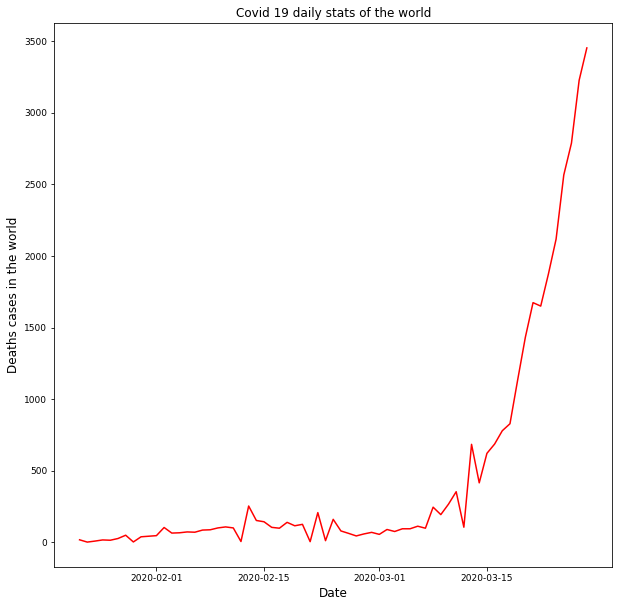

In [34]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_World'],color='red')
ax.set(xlabel="Date",ylabel="Deaths cases in the world",title="Covid 19 daily stats of the world")
plt.show()

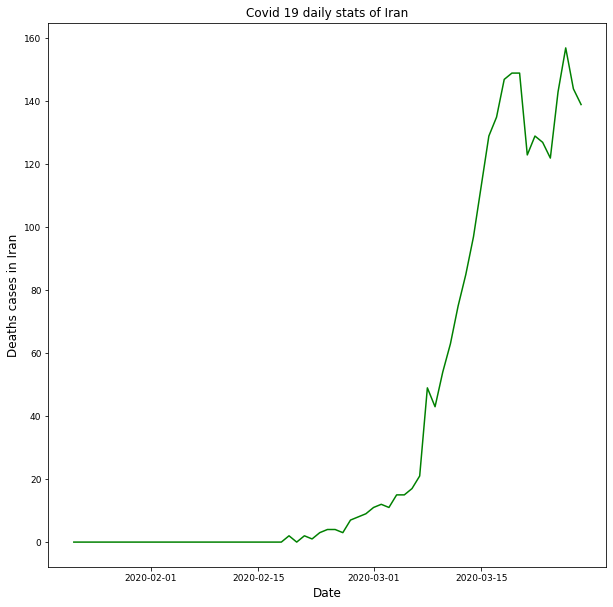

In [35]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_Iran'],color='green')
ax.set(xlabel="Date",ylabel="Deaths cases in Iran",title="Covid 19 daily stats of Iran")
plt.show()

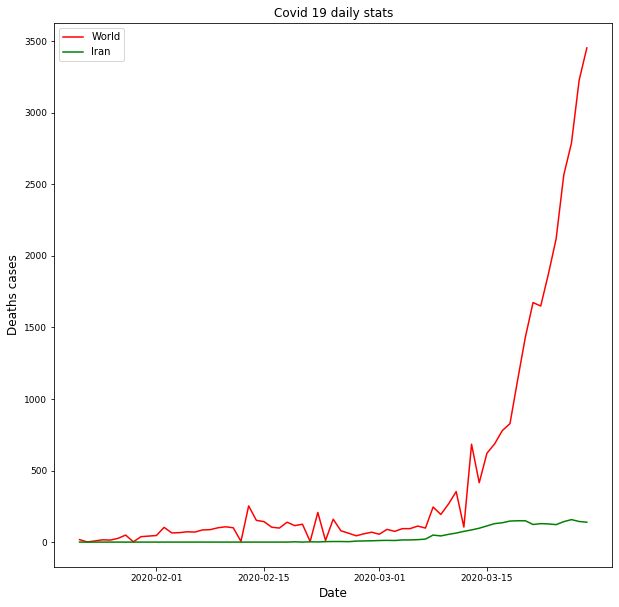

In [36]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_World'],color='red')
ax.set(xlabel="Date",ylabel="Deaths cases",title="Covid 19 daily stats")
ax.plot(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_Iran'],color='green')
ax.set(xlabel="Date",ylabel="Deaths cases",title="Covid 19 daily stats")
ax.legend(["World", "Iran"], loc=2)
plt.show()

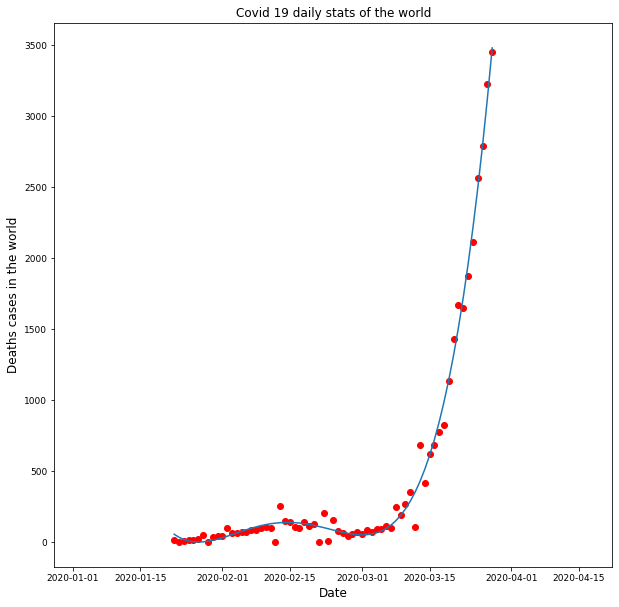

In [37]:
#Model world 's data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_World'],color='red')
ax.set(xlabel="Date",ylabel="Deaths cases in the world",title="Covid 19 daily stats of the world")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=4, include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(x2, y2)
curve = pipeline_reg.predict(x2)
plt.plot(x2, curve)
plt.show()

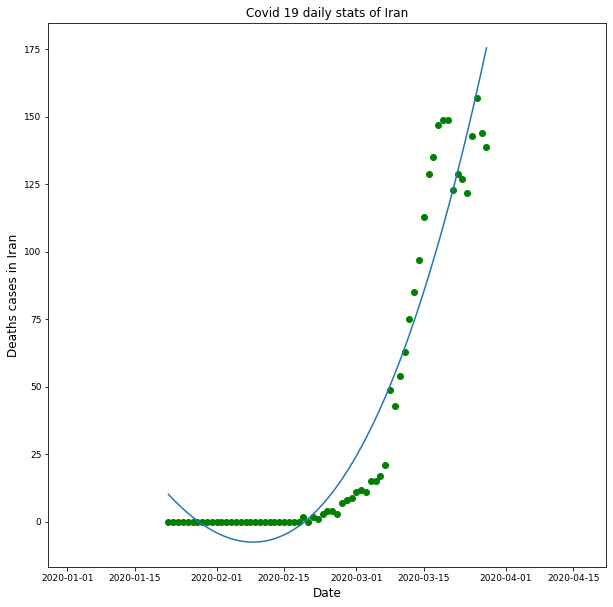

In [38]:
#Model Iran 's data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_Iran'],color='green')
ax.set(xlabel="Date",ylabel="Deaths cases in Iran",title="Covid 19 daily stats of Iran")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=3, include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(xx, yy)
curve = pipeline_reg.predict(xx)
plt.plot(xx, curve)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   66
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -405.364
Method:                       css-mle   S.D. of innovations            110.582
Date:                Sun, 29 Mar 2020   AIC                            824.729
Time:                        18:20:10   BIC                            840.056
Sample:                    01-23-2020   HQIC                           830.785
                         - 03-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.9752    111.976      1.036      0.300    -103.494     335.445
ar.L1.D.y     -0.3097      0.119     -2.603      0.009      -0.543      -0.076
ar.L2.D.y      0.3938      0.119      3.308      0.0

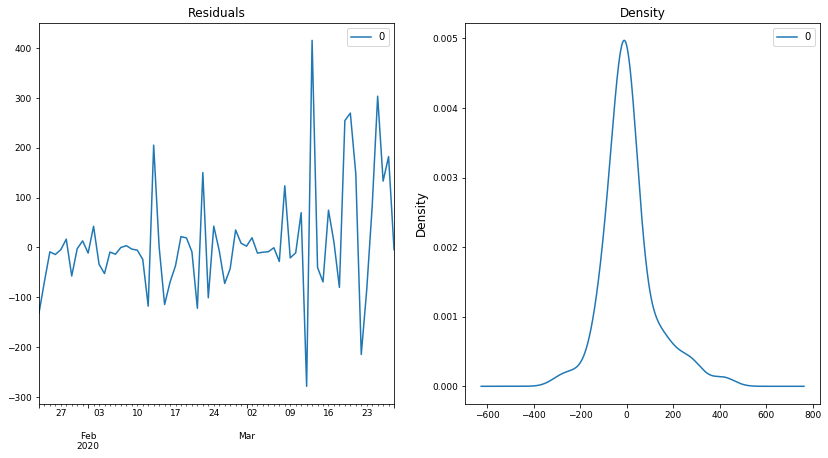

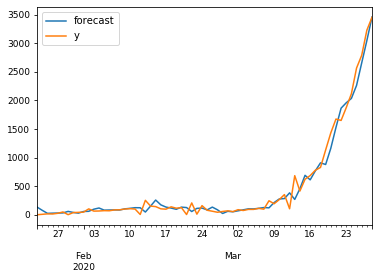

In [39]:
#Model
covid_19_daily_stats_death[1].to_csv('covid_w.csv')
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

series=pd.read_csv('covid_w.csv',header=0)
model=ARIMA(covid_19_daily_stats_death[1],order=(5,1,0))
model_fit=model.fit(desp=0)
print(model_fit.summary())
fig, ax = plt.subplots(1,2,figsize=(14,7))
residuals=DataFrame(model_fit.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
model_fit.plot_predict(dynamic=False)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   66
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -220.034
Method:                       css-mle   S.D. of innovations              6.756
Date:                Sun, 29 Mar 2020   AIC                            454.068
Time:                        18:20:12   BIC                            469.395
Sample:                    01-23-2020   HQIC                           460.124
                         - 03-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9779      1.180      1.676      0.094      -0.335       4.290
ar.L1.D.y      0.1138      0.120      0.950      0.342      -0.121       0.349
ar.L2.D.y      0.1311      0.126      1.042      0.2

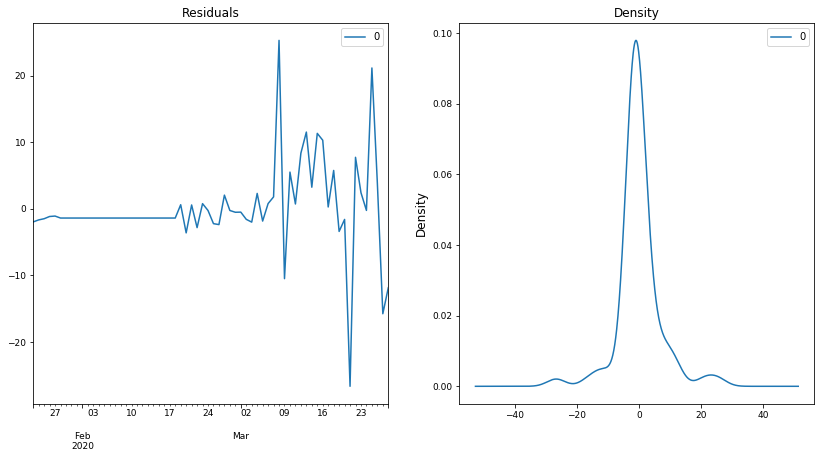

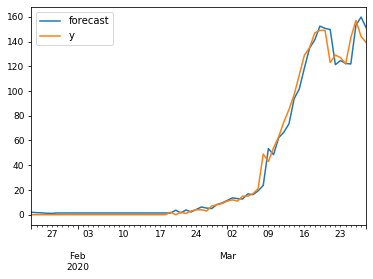

In [40]:
#Model
covid_19_daily_stats_death[2].to_csv('covid_i.csv')
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

series=pd.read_csv('covid_i.csv',header=0)
model=ARIMA(covid_19_daily_stats_death[2],order=(5,1,0))
model_fit=model.fit(desp=0)
print(model_fit.summary())
fig, ax = plt.subplots(1,2,figsize=(14,7))
residuals=DataFrame(model_fit.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
model_fit.plot_predict(dynamic=False)
plt.show()